<a href="https://colab.research.google.com/github/cyberanalyst268/Data-Science-and-Decision-Making/blob/main/bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define our actions

def action_0():
    return np.random.choice([1, 0], p=[0.5, 0.5])

def action_1():
    return np.random.choice([1, 0], p=[0.6, 0.4])

def action_2():
    return np.random.choice([1, 0], p=[0.2, 0.8])

rewards = [action_0, action_1, action_2]

In [3]:
for i in range(10):
    print('Pull %d (action_0): reward=%d' % (i, rewards[0]()))

Pull 0 (action_0): reward=0
Pull 1 (action_0): reward=1
Pull 2 (action_0): reward=0
Pull 3 (action_0): reward=1
Pull 4 (action_0): reward=0
Pull 5 (action_0): reward=1
Pull 6 (action_0): reward=1
Pull 7 (action_0): reward=0
Pull 8 (action_0): reward=0
Pull 9 (action_0): reward=1


In [4]:
# Simulate action values (Q): expected reward for each action
pulls = 100000

action_values = []
for reward in rewards:
    value = [reward() for _ in range(pulls)]  # execute each of the actions 'pulls' times
    action_values.append(value)

for action, value in enumerate(action_values):
    print("Action %d: Q(a_%d)=%.2f" % (action, action, np.mean(value)))

Action 0: Q(a_0)=0.50
Action 1: Q(a_1)=0.60
Action 2: Q(a_2)=0.20


In [5]:
# To simulate the values (V), we need to define a policy
# (Value is the expected reward given the policy I'm following)

# Define a policy:
def policy_random():
    '''Returns which action to perform using equal probabilities for each action'''
    return np.random.choice([0, 1, 2], p=[1/3, 1/3, 1/3])


def policy_better():
    ''' A better policy than random: we choose actions 0 and 1 more often than action 2'''
    return np.random.choice([0, 1, 2], p=[0.4, 0.5, 0.1])


In [6]:
# Simulate Values using the random policy
total_reward = 0
for pull in range(pulls):
    action = policy_random()
    total_reward += rewards[action]()
print("Total reward =", total_reward)
print("Average reward: V =", total_reward/pulls)

Total reward = 43395
Average reward: V = 0.43395


In [7]:
# Simulate Values using the better policy
total_reward = 0
for pull in range(pulls):
    action = policy_better()
    total_reward += rewards[action]()
print("Total reward =", total_reward)
print("Average reward: V =", total_reward/pulls)

Total reward = 51818
Average reward: V = 0.51818


In [8]:
# Regret of the better policy
V_star = max([np.mean(value) for value in action_values])
print("V* =", V_star)

total_regret = 0
for pull in range(pulls):
    total_regret += (V_star - rewards[policy_better()]())
print('Regret: I_t = %.2f' % (total_regret/pulls))

V* = 0.6026
Regret: I_t = 0.08


In [9]:
# Some bandit policies to explore:

def policy_greedy(action_values):
    '''Always returns the action for which the payoff is highest'''
    best_action = np.argmax([np.mean(value) for value in action_values])
    return best_action


def policy_e_greedy(action_values, epsilon=0.05):
    '''We explore with epsilon probability, and choose the best action the rest of the time'''
    explore = np.random.choice([1, 0], p=[epsilon, 1-epsilon])
    if explore:
        # Random action
        return policy_random()
    else:
        # Choose best action
        return policy_greedy(action_values)



In [10]:
# Implementing the decaying epsilon-greedy properly requires a class definition so we can store the epsilon values
class DecayingEGreedy:
    
    def __init__(self, epsilon, decay=0.99, lower_bound=0):
        self.epsilon = epsilon
        self.decay = decay
        self.lower_bound = lower_bound
        
    def policy(self, action_values):
        if self.lower_bound > 0 and self.epsilon > self.lower_bound:
            self.epsilon *= self.decay  # update epsilon
        explore = np.random.choice([1, 0], p=[self.epsilon, 1-self.epsilon])  # explore vs exploit decision
        if explore:
            # Random action
            return policy_random()
        else:
            # Choose best action
            return policy_greedy(action_values)


In [11]:
# Let's test the decaying epsilon-greedy approach
agent = DecayingEGreedy(epsilon=0.1, decay=0.99, lower_bound=0.03)

# Full problem:
action_values = [[], [], []] # initialise values
rewards_decaying_e_greedy = []
total_reward = 0
print('Number of pulls\t\tTotal reward\t\tV')
for pull in range(pulls):
    action = agent.policy(action_values)  # choose action according to policy
    reward = rewards[action]()  # get reward
    action_values[action].append(reward)  # update action_values so we make better decisions down the line
    total_reward += reward
    if (pull+1) % 1000 == 0:
        print('%d\t\t\t%d\t\t\t%.3f' % (pull+1, total_reward, total_reward/pull))
        rewards_decaying_e_greedy.append(total_reward/pull)



Number of pulls		Total reward		V
1000			593			0.594


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2000			1170			0.585
3000			1753			0.585
4000			2347			0.587
5000			2965			0.593
6000			3575			0.596
7000			4167			0.595
8000			4764			0.596
9000			5365			0.596
10000			5938			0.594
11000			6511			0.592
12000			7118			0.593
13000			7712			0.593
14000			8323			0.595
15000			8900			0.593
16000			9496			0.594
17000			10078			0.593
18000			10672			0.593
19000			11260			0.593
20000			11853			0.593
21000			12446			0.593
22000			13059			0.594
23000			13629			0.593
24000			14227			0.593
25000			14846			0.594
26000			15454			0.594
27000			16053			0.595
28000			16662			0.595
29000			17264			0.595
30000			17876			0.596
31000			18490			0.596
32000			19099			0.597
33000			19681			0.596
34000			20280			0.596
35000			20887			0.597
36000			21484			0.597
37000			22093			0.597
38000			22702			0.597
39000			23266			0.597
40000			23878			0.597
41000			24472			0.597
42000			25044			0.596
43000			25675			0.597
44000			26257			0.597
45000			26875			0.597
46000			27464			0.597
47000			28035			0.597
48000			286

Text(0, 0.5, 'Average reward (V)')

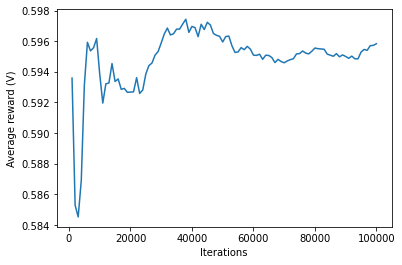

In [12]:
plt.plot(np.arange(1000, pulls+1, step=1000), rewards_decaying_e_greedy)
plt.xlabel("Iterations")
plt.ylabel("Average reward (V)")
# The average reward is 0.594, which is very close to V* (0.6)!

In [13]:
# Implementing the decaying epsilon-greedy properly requires a class definition so we can store the epsilon values
class UCB:
    
    def __init__(self, C=0.5, n_arms=3):
        self.C = C
        self.pulls = 0
        self.counts = np.asarray([0] * n_arms)
        
    def update_counts(self, arm):
        self.pulls += 1
        self.counts[arm] += 1
        
    def policy(self, action_values):
        action_values = np.asarray([np.mean(value) for value in action_values])
        uncertainty = np.sqrt(np.log(self.pulls) / self.counts)
        ucb = action_values + self.C * uncertainty
        action = np.argmax(ucb)
        self.update_counts(action)
        return action


In [14]:
# Let's test the decaying epsilon-greedy approach
agent = UCB(C=0.5)

# Full problem:
action_values = [[], [], []] # initialise values
total_reward = 0 # reset reward
rewards_ucb = []
print('Number of pulls\t\tTotal reward\t\tV')
for pull in range(pulls):
    action = agent.policy(action_values)  # choose action according to policy
    reward = rewards[action]()  # get reward
    action_values[action].append(reward)  # update action_values so we make better decisions down the line
    total_reward += reward
    if (pull+1) % 1000 == 0:
        print('%d\t\t\t%d\t\t\t%.3f' % (pull+1, total_reward, total_reward/pull))
        rewards_ucb.append(total_reward/pull)


Number of pulls		Total reward		V
1000			592			0.593


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


2000			1174			0.587
3000			1768			0.590
4000			2387			0.597
5000			2980			0.596
6000			3616			0.603
7000			4199			0.600
8000			4766			0.596
9000			5378			0.598
10000			5966			0.597
11000			6595			0.600
12000			7185			0.599
13000			7791			0.599
14000			8378			0.598
15000			8979			0.599
16000			9581			0.599
17000			10170			0.598
18000			10782			0.599
19000			11399			0.600
20000			12014			0.601
21000			12606			0.600
22000			13201			0.600
23000			13797			0.600
24000			14413			0.601
25000			15015			0.601
26000			15589			0.600
27000			16187			0.600
28000			16797			0.600
29000			17382			0.599
30000			17968			0.599
31000			18561			0.599
32000			19165			0.599
33000			19776			0.599
34000			20417			0.601
35000			21037			0.601
36000			21624			0.601
37000			22225			0.601
38000			22821			0.601
39000			23429			0.601
40000			24014			0.600
41000			24606			0.600
42000			25190			0.600
43000			25794			0.600
44000			26387			0.600
45000			27000			0.600
46000			27584			0.600
47000			28197			0.600
48000			287

Text(0, 0.5, 'Average reward (V)')

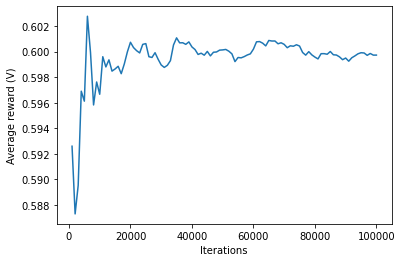

In [15]:
plt.plot(np.arange(1000, pulls+1, step=1000), rewards_ucb)
plt.xlabel("Iterations")
plt.ylabel("Average reward (V)")